# Corona Virus
### **Introdução**

Neste notebook vamos fazer uma apresentação ás diferentes base de dados, analisar os dados, tratar os dados e tirar algumas conclusões.

Numa primeira fase fazemos os imports necessários para fazer a análise e tratamento dos dados. Para além disso carrega-se a base de dados através de um github que é atualizado todos os dias o que nos permite ter sempre os dados atuais(em detrimento do carregamento local).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from datetime import datetime as dt
import calendar

### **Loading Data**

In [2]:
df_mortes=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_confirmados=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_recuperados=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### **Data Preview**

In [3]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [4]:
df_recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,789,789,791,792,792,792,792,796,797
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,61,64,64,64,64,66,66,77,77,77


In [5]:
df_mortes=df_mortes.drop(columns=['Country/Region','Lat','Long'])

### **Exploração dados**


Na proxima secção  faz-se uma análise dos dados de forma detalhada através da realização de alguns gráfico onde é permitido visualizar a evolução da pandemia no mundo e nos diferentes países.

Antes de começarmos a fazer os gráficos foi necessário somar os diferentes dados para obtermos os totais do mundo inteiro(mortes_total,confirmados_total,recupeados_total) para além disso, também foram removidas algumas variáveis do dataset pois considerámos irrelevantes para a resolução do nosso problema.

Fazemos gráficos para os Casos Totais,Recuperados Totais e Mortes Totais.

In [6]:
df_confirmados=df_confirmados.drop(columns=['Country/Region','Lat','Long'])
df_recuperados=df_recuperados.drop(columns=['Country/Region','Lat','Long'])

## Casos Totais vs Recuperados

Neste gráfico fazemos uma comparação entre os casos totais e os recuperados. Podemos verificar o crescimento dos casos totais que continuam a crescer exponencialmente e neste momento ainda não é possivel visualizar uma aproximação entre a linha de casos recuperados e casos totais que significava o fim da pandemia.

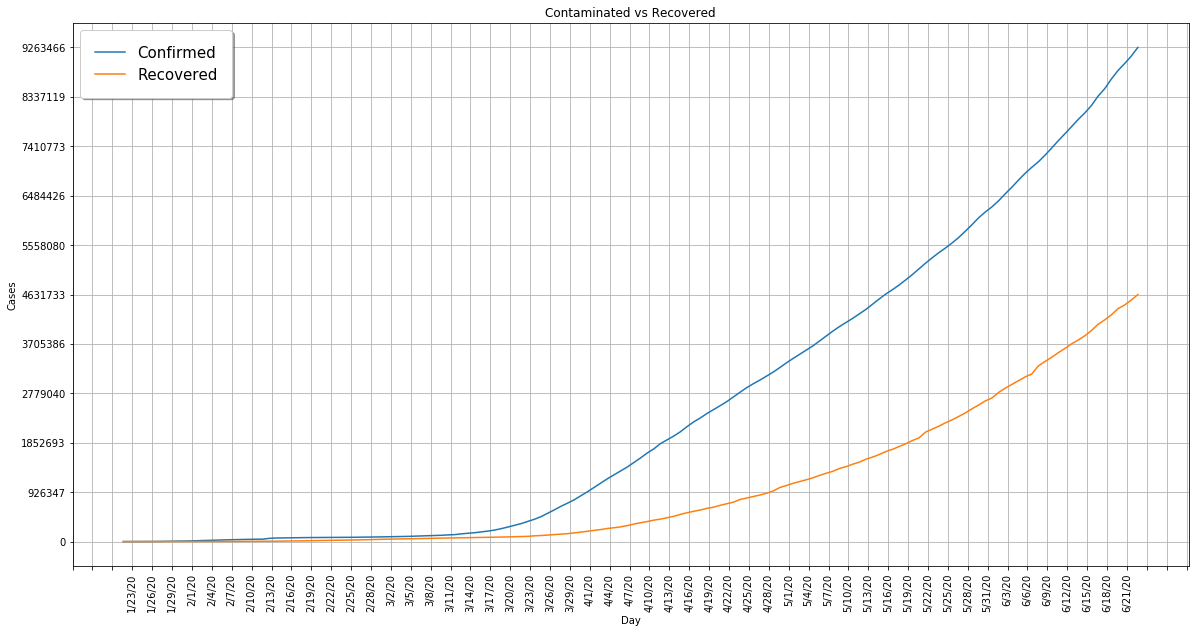

In [7]:
confirmados_total=df_confirmados.sum()
recuperados_total=df_recuperados.sum()
mortes_total=df_mortes.sum()


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(confirmados_total,label='Confirmed')
ax.plot(recuperados_total,label='Recovered')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='15')
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, max(confirmados_total)+1, max(confirmados_total)/10))
ax.set(xlabel='Day',
       ylabel='Cases',
       title='Contaminated vs Recovered')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
ax.grid()

plt.show()

## Casos Ativos

Neste gráfico visualiza-se a linha de Casos Ativos(Casos Totais - Mortes Totais-Recuperados Totais). O intuito deste gráfico foi conseguirmos visualizar se os valores da pandemia estavam a subir ou se estavam a descer. Infelizmente apenas entre '6-6-2020' e '6-9-20' é que verificámos uma descida nos casos ativos. 

Este gráfico mostra que os casos continuam a crescer exponencialmente principalmente em alguns países onde o crescimento é maior.

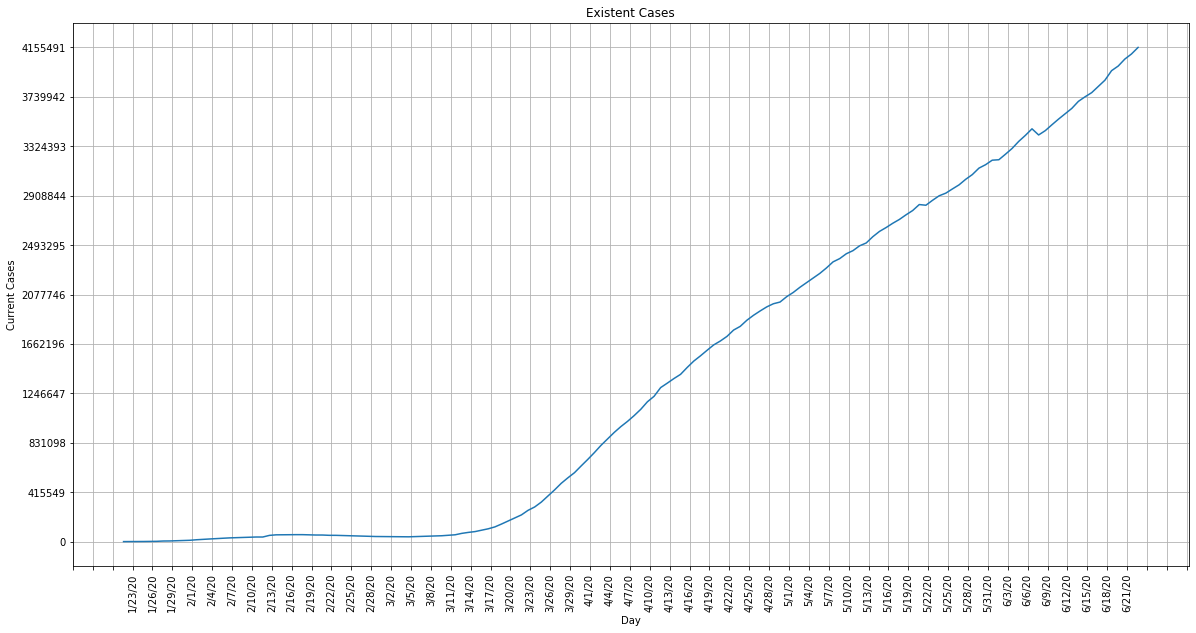

In [8]:
CasosAtuais=confirmados_total-recuperados_total-mortes_total
CasosAtuais
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(CasosAtuais)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, max(CasosAtuais)+1, max(CasosAtuais)/10))
ax.set(xlabel='Day', ylabel='Current Cases',
       title='Existent Cases')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
ax.grid()

plt.show()

## Países
Antes de fazermos gráficos para cada país foi necessário fazer algum tratamento dos dados. A primeira coisa a ser feita foi eliminar as colunas 'Province/State', 'Lat' e 'Long' e agrupar os dados por país(uma linha para cada país). Voltámos a criar as variáveis casos totais,recuperados, mortes e ativos mas, desta vez é referente a cada país em específico.



In [9]:
class pais():
    def __init__(self,_country):
       self.country = _country
       self.PrepareData()
    def PrepareData(self):
        df_mortes2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        df_confirmados2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        df_recuperados2=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

        
        confirmados_pais = df_confirmados2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()
        mortes_pais = df_mortes2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()
        recuperados_pais = df_recuperados2.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()


        df_pais_totais=confirmados_pais.loc[[self.country]]
        df_pais_ativos=confirmados_pais.loc[[self.country]]-recuperados_pais.loc[[self.country]]-mortes_pais.loc[[self.country]]
        df_pais_recuperados=recuperados_pais.loc[[self.country]]
        df_pais_mortes=mortes_pais.loc[[self.country]]
       

        df_pais_ativos.head()
        self.pais_ativos=df_pais_ativos.sum()

        self.pais_recuperados=df_pais_recuperados.sum()

        self.pais_mortes=df_pais_mortes.sum()

        self.pais_total=df_pais_totais.sum()
    def Graficos(self):

        fig, ax = plt.subplots(figsize=(20, 10))
        fig.suptitle('Daily Corona Cases '+self.country, fontsize=25, fontweight='bold', color='#0c3c6e')
        plt.xlabel('Day', fontsize=20)
        plt.ylabel('Current cases', fontsize=20)
        ax.plot(self.pais_ativos,label="Active")
        ax.plot(self.pais_recuperados,label="Recovered")
        ax.plot(self.pais_mortes,label="Deaths")
        ax.plot(self.pais_total,label="Total")
        ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='15')
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 3))
        plt.xticks(rotation='vertical')
        ax.grid()
        #fig.savefig('static/Activos.png')
        plt.show()
        
        #-----------------------------CASOS DIÁRIOS----------------------------------------------
        
        self.total = self.pais_total
        self.pais_total=self.pais_total.to_frame()
        lista_values=[]
        lista_index=[]
        
        for index, row in self.pais_total.iterrows():
            if row.sum()>0:
                lista_values.append(int(row-sum(lista_values)))
                lista_index.append(index)
            
        fig, ax = plt.subplots(figsize=(20, 10))
        fig.suptitle('Daily Corona Cases '+self.country, fontsize=15, color='#0c3c6e')

        plt.xlabel('Day', fontsize=10)
        plt.ylabel('Cases per day', fontsize=10)
        

        self.df_values=pd.DataFrame(index=lista_index)
        
        self.df_values['CasosDiarios']=lista_values
        #print(df_values)
        #df_values.index=self.pais_total.index
        ax.bar(self.df_values.index,self.df_values[:]['CasosDiarios'])
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 3))
        plt.xticks(rotation='vertical')
        ax.grid()
        #fig.savefig('static/Casos_diarios.png')
        plt.show()
        
        #-----------------------------MORTES DIÁRIOS----------------------------------------------
        
        self.mortes = self.pais_mortes
        self.pais_mortes=self.pais_mortes.to_frame()
        mortes_values=[]
        mortes_index=[]
        
        for index, row in self.pais_mortes.iterrows():
            if row.sum()>0:
                mortes_values.append(int(row-sum(mortes_values)))
                mortes_index.append(index)
        
        
        
        fig, ax = plt.subplots(figsize=(20, 10))
        fig.suptitle('Daily Corona Deaths '+self.country, fontsize=15, color='#0c3c6e')
        plt.xlabel('Day', fontsize=10)
        plt.ylabel('Deaths per day', fontsize=10)
        
        df_mortes=pd.DataFrame(index=mortes_index)
        
        df_mortes['Mortes']=mortes_values
        
        ax.bar(df_mortes.index,df_mortes[:]['Mortes'])
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 3))
        plt.xticks(rotation='vertical')
        ax.grid()
        plt.show()
        
    def CorrigirCasosNegativos(self,fator,df):
        df=df.reset_index()
        for index,row in df.iterrows():
            if(row['CasosDiarios']<0):

                #print(abs(row['CasosDiarios']))
                #print(index)
                #print(df[index-fator:index+1])
                
                df.loc[index-fator:index,'CasosDiarios']=df.loc[index-fator:index,'CasosDiarios'].sub(int(abs(row['CasosDiarios'])/fator))
                row['CasosDiarios']=int(abs(row['CasosDiarios'])/fator)
                df.loc[index,'CasosDiarios']=row['CasosDiarios']
                #print(df[index-fator:index+1])
                #print(row['CasosDiarios'])
        self.df_values=df
        

### **Análise País**

Nesta secção é permitido escolher o país e a sua análise é dinâmica ou seja, quando escrevemos um país vamos visualizar sempre três gráficos referentes a esse país (neste caso optámos por escolher Portugal).

No primeiro gráfico podemos visualizar a evolução da pandemia no país com as diferentes variáveis, anteriormente nos casos globais dividimos os gráfico mas, desta vez, decidimos juntas todas as variáveis ( Casos Totais, Casos Ativos, Recuperados e Mortes) apenas num gráfico para resumir toda a situação e comparar as variáveis mais facilmente.

No segundo gráfico temos os casos diários no país. Podemos verificar que um dia os casos diários foram negativos, obviamente que os casos diários nunca podem ser negativos e deve-se a uma recontagem dos casos onde foram verificados alguns dados eram duplicados. Estas situações têm de ser tratadas pois, são bastante prejudiciais para os modelos. O seu tratamento será feito na proxima secção.

No terceiro gráfico é possível visualizar as mortes diárias no país.

Não fizemos gráficos para os recuperados pois, decidimos que não vamos utilizar a variável no futuro porque em muitos países não estão a ser contados ou são apresentados todos de uma vez (como o caso de Portugal que tivémos 10 000 casos recuperados em um único dia). Esta situação dificulta a previsão da variável porque não temos os dados estruturados sequencialmente e esse foi o motivo de não utilizarmos a variável.

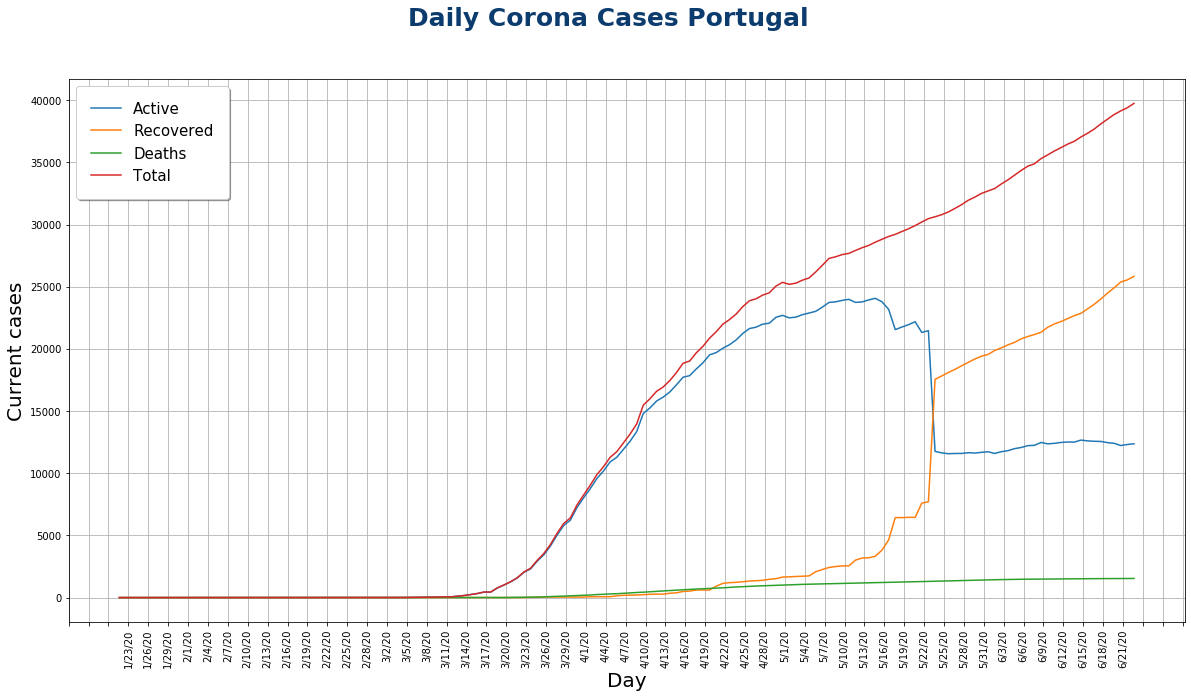

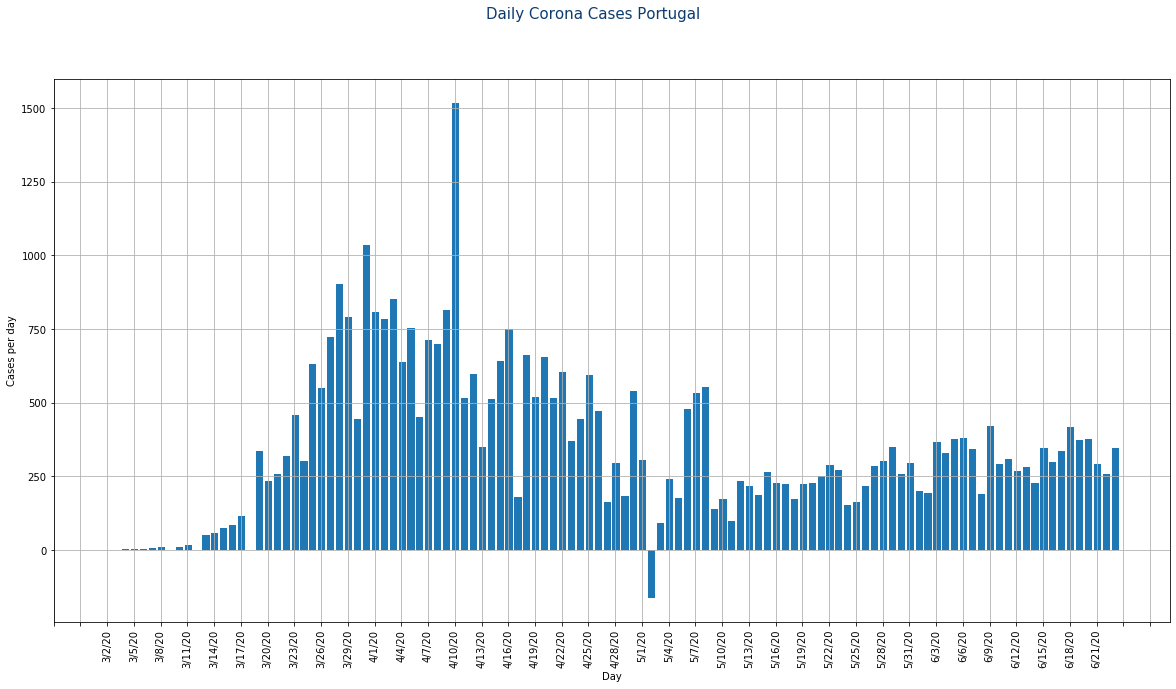

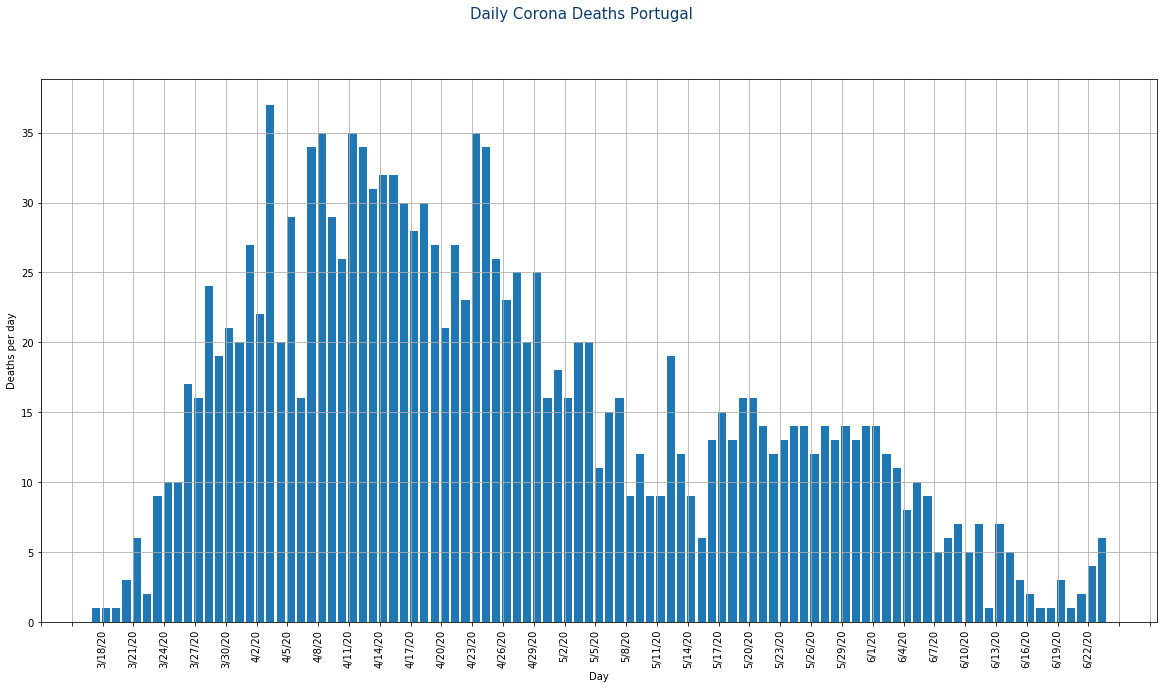

In [10]:
nome="Portugal"
data = pais(nome)
data.Graficos()


## Gráfico casos diários tratados

Criámos uma função da classe pais que se chama "CorrigirCasosNegativos" onde dámos o dataset e uma variável "fator" que significa o número de dias para trás que vai substituir os dados. Neste caso o dado negativo vai ser distribuído ao longo dos 18 dias anteriores.

In [11]:

# Número de dias que subtrai os casos
fator=18
#data.df_values são os casos diários do país referente
data.CorrigirCasosNegativos(fator,data.df_values)

## Gráfico casos diários com os casos negativos tratados

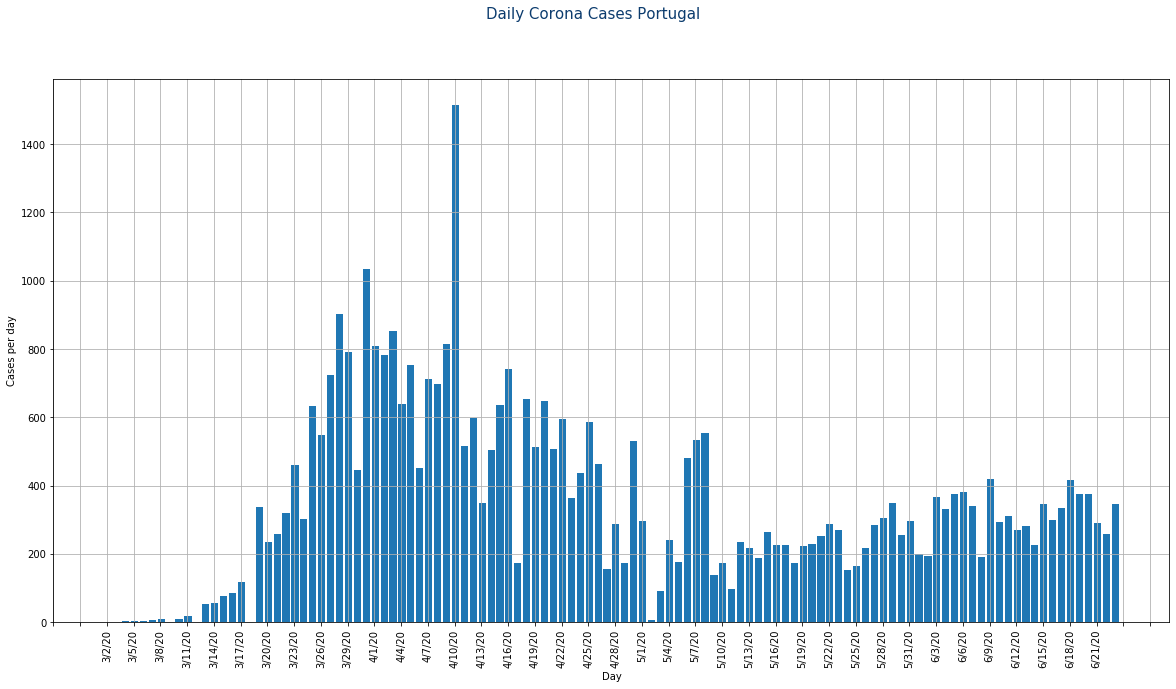

In [12]:
#-----------------------------CASOS DIÁRIOS----------------------------------------------
        
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Daily Corona Cases '+data.country, fontsize=15, color='#0c3c6e')

plt.xlabel('Day', fontsize=10)
plt.ylabel('Cases per day', fontsize=10)

ax.bar(data.df_values['index'],data.df_values[:]['CasosDiarios'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
plt.xticks(rotation='vertical')
ax.grid()
#fig.savefig('static/Casos_diarios.png')
plt.show()
        

## Week day

Nesta secção decidimos aplicar feature engineering, deste modo através dos atributos originais, nomeadamente a data obteve-se o dia da semana(0 a 6).

Gráfico onde é comparada a média de casos diários nos diferentes dias da semana, de realçar que os valores equivalem ao dia anterior por exemplo, os valores de sabado equivalem à média de casos diários na sexta feira.

Pode-se verificar que a média de casos diários é menor ao domingo e segunda(que equivale a sábado e domingo).

Estes resultados são mais acentuados em outros países como por exemplo o 'Brazil' e este facto deve-se a muitos dos laboratórios encontrarem-se encerrados durante o fim de semana.

Depois de constatar este facto decidimos utilizar o 'WeekDay' nas previsões.

In [20]:
data.df_values
WeekDay=[]
for val in data.df_values['index']:
    current_date = dt.strptime(val,'%m/%d/%y')
    WeekDay.append(current_date.weekday())
    
data.df_values['WeekDay']=WeekDay

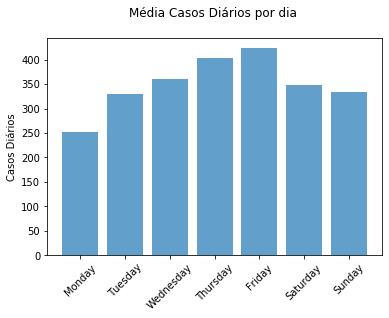

In [19]:
df_totalCases= data.df_values.groupby('WeekDay').mean()
df_totalCases=df_totalCases['CasosDiarios']
dia = []
for i in range(0,7):
    dia = dia + [str(calendar.day_name[i])]
df_totalCases.index=dia
df_totalCases
def Grafico_SpeedDiff_por_dia(df):
    fig, ax = plt.subplots()
    plt.bar(df.index, df, align='center', alpha=0.7)
    
    plt.title('Média Casos Diários por dia \n')
    plt.ylabel("Casos Diários")
    plt.xticks(rotation=45)
    plt.show()
    #fig.savefig("Imagens/Speed_Diff_Dia.png")

Grafico_SpeedDiff_por_dia(df_totalCases)

### **Data Understanding conclusão**

Neste notebook foi possível visualizar toda a nossa análise dos dados e o seu respetivo tratamento. A análise da pandemia a nível global e nacional ajudou-nos a ter uma melhor perceção da situação.

Nos próximos notebook vamos criar diferentes modelos para comparar os resultados das previsões para os casos totais e mortes sendo verificado qual o melhor modelo.
